In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model= ChatOpenAI()

In [17]:
class BlogState(TypedDict):

    topic: str
    outline: str
    content: str
    score: int

In [7]:
def create_outline(state: BlogState) -> BlogState:

    topic = state['topic']

    prompt = f"Generate a detailed outline for a blog on the topic {topic}"

    outline = model.invoke(prompt)

    state['outline'] = outline
    return state

In [8]:
def create_blog(state: BlogState) -> BlogState:

    outline = state['outline']

    prompt = f"Generate a blog from this outline {outline}"

    content = model.invoke(prompt)
    state['content'] = content
    return state

In [18]:
def score(state: BlogState) -> BlogState:

    outline = state['outline']
    content = state['content']

    prompt = f"Based on this outline {outline} evaluate my blog {content} and give a score out of 10"

    score = model.invoke(prompt)

    state['score'] = score
    return state

In [19]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', score)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()

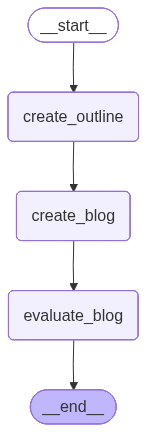

In [20]:
# to visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
initial_state  = {'topic': 'RAG'}

final_state = workflow.invoke(initial_state)

In [22]:
final_state

{'topic': 'RAG',
 'outline': AIMessage(content='I. Introduction\n   A. Explanation of RAG and its significance in project management\n   B. Overview of what will be covered in the blog\n\nII. What is RAG?\n   A. Definition of RAG (Red, Amber, Green) status\n   B. How is RAG used in project management?\n   C. Examples of when RAG status might be used in projects\n\nIII. Benefits of using RAG\n   A. Helps to easily identify projects that are on track and those that need attention\n   B. Provides a quick visual representation of project progress\n   C. Allows for quick decision making and resource allocation\n\nIV. How to determine RAG status\n   A. Criteria for assigning RAG status\n   B. Who is responsible for determining RAG status?\n   C. How often should RAG status be updated?\n\nV. Common challenges with using RAG\n   A. Misinterpretation of RAG status\n   B. Lack of consistency in assigning RAG status\n   C. Over-reliance on RAG status as the sole indicator of project success\n\nVI